<a href="https://colab.research.google.com/github/Roopg/Clustering-Projects/blob/main/Clustering_for_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Clustering for customer segmentation

Ecommerce companies such as Amazon, rely heavily on customer segmentation to recommend the right products and offers to the users when they login into their platform.

In this retail customer segmentation case study, we use a simple baseline algorithm called K-means that uses a centroid based approach to find the cluster that best group the datapoints based on the attributes. 

The retail customer dataset that we will be using comprises of the following 6 different customer features-

- Number of clicks on the retail website
- Number of visits to the website
- Amount_spent by the user on buy products from the website
- total amount of discount availed by the user while shopping
- Number of days since the user first registered on the website
- User profile information

As this is an unsupervised technique we obviously do not have any labels. The k-means algo will generate the labels for each of the customer records and group the datapoints with similar labels into clusters.

The objective of our case study is to-

- Cluster a user base for the ecommerce company using K-means Clustering

- Draw insights from the clusters (customer segments) from a business prespective and provide recommendations

- Explore methods to pick the optimal value of k- which is the number of centroids and an important hyperparameter in the K-means clustering algo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/E-commerce.csv")

In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


### Rounding off the "amount_spent" and "amount_discount" values to 2 decimal places.

In [ ]:
df["amount_spent"].round(decimals=2)

0        213.91
1        639.22
2       1157.40
3       1195.90
4        180.75
         ...   
2495     502.64
2496     530.01
2497       0.00
2498    3190.50
2499    1394.59
Name: amount_spent, Length: 2500, dtype: float64

In [ ]:
df["amount_discount"].round(decimals=2)

0         31.60
1          5.69
2        844.32
3        850.04
4         64.28
         ...   
2495     373.41
2496     122.64
2497       0.00
2498      78.13
2499    1065.42
Name: amount_discount, Length: 2500, dtype: float64

In [ ]:
df.shape

(2500, 7)

### Check for duplicates

In [ ]:
# Returns True of duplicate and series of boolean values
dup_rows = df.duplicated()
dup_rows.sum()

0

We have a small dataset of 2500 unique customers and 7 customer attributes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


We have 2 continuous features (amount_spent and amount_discount) and 5 discrete features. We have no categorical features in the given dataset.

### Data cleaning and preprocessing 

#### Dropping the unique identifier-"ID" as we do not want our model to draw any learning from the ID feature.

In [ ]:
X=df.drop("ID",axis=1)

In [ ]:
X.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,130,65,213.905831,31.600751,233,235
1,543,46,639.223004,5.689175,228,170
2,520,102,1157.402763,844.321606,247,409
3,702,83,1195.903634,850.041757,148,200
4,221,84,180.754616,64.283300,243,259


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
n_clicks,2500.0,408.680000,186.414090,50.0,274.750000,378.000000,522.000000,1246.000000
n_visits,2500.0,94.475600,38.866356,10.0,67.000000,92.000000,119.000000,259.000000
amount_spent,2500.0,1445.090745,1167.663473,0.0,609.618538,1036.189112,1949.270949,6567.402267
amount_discount,2500.0,388.508637,487.143968,0.0,56.298615,137.454623,679.540536,2428.406527
days_since_registration,2500.0,200.973600,99.136618,0.0,130.000000,200.000000,268.000000,514.000000
profile_information,2500.0,201.040400,100.139213,0.0,132.000000,201.000000,270.000000,585.000000


Some key observations from the above 5-point summary-

- No misisng values in any of our features.
- Highest difference between median and mean values of amount_discount. This indicates the presence of outliers.


#### As our most of the features in our dataset have different scales and the distance metric we compute will be a combination of all of them, we do not want our model to give more importance to higher numbers and vice versa. Hence we will perform mean centering and variance scaling on our data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
X

array([[-1.49525046, -0.75853514, -1.05461141, -0.73280039,  0.32311781,
         0.33919174],
       [ 0.72069055, -1.24748762, -0.69029218, -0.78600183,  0.27267227,
        -0.31003449],
       [ 0.59728463,  0.19363547, -0.24642848,  0.93587151,  0.46436533,
         2.07712043],
       ...,
       [-0.18070918,  0.42524454, -1.2378394 , -0.7976828 , -1.18015931,
         2.52658475],
       [-0.73871854, -1.60776839,  1.49508613, -0.63726061, -0.90775339,
         0.13942982],
       [ 2.17473416,  0.73405663, -0.04325887,  1.38982053,  0.47445444,
        -0.51978451]])

### Building the clustering model with an arbitary value of k (Number of clusters)

In [ ]:
from sklearn.cluster import KMeans
k = 4 ## arbitrary value at the beginning. We explore different methods to select best value of k, later in the study.
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

### The learned clusters number/labels

In [ ]:
y_pred

array([0, 0, 1, ..., 2, 3, 1], dtype=int32)

#### y_pred gives us the list of all the cluster indices

### Coordinates of the cluster centers or centroids

In [ ]:
kmeans.cluster_centers_

array([[-0.1028453 , -0.21316367, -0.62607964, -0.47661202, -0.78066202,
        -0.02816393],
       [-0.84613876, -0.69485109,  1.61877747, -0.62844786, -0.03170457,
         0.13929865],
       [ 1.03741744,  0.88188429, -0.0296726 ,  1.51886906, -0.01326149,
        -0.01503239],
       [-0.19054869, -0.04305592, -0.62964535, -0.42760056,  0.90450663,
        -0.07050805]])

In [ ]:
y_pred is kmeans.labels_

True

### Now let us visualize our clusters

In [ ]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118,0.339192,0
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672,-0.310034,0
2,0.597285,0.193635,-0.246428,0.935872,0.464365,2.077120,1
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456,-0.010392,1
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009,0.578906,0
...,...,...,...,...,...,...,...
2495,2.121079,0.656854,-0.807284,-0.030993,1.634702,-0.939285,0
2496,0.393397,-0.887207,-0.783838,-0.545880,-0.897664,1.527775,2
2497,-0.180709,0.425245,-1.237839,-0.797683,-1.180159,2.526585,2
2498,-0.738719,-1.607768,1.495086,-0.637261,-0.907753,0.139430,3


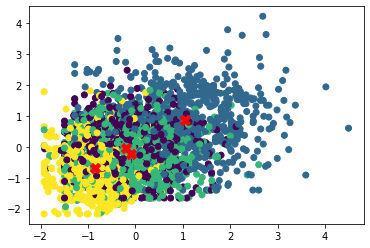

In [ ]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['n_visits'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    
viz_clusters(kmeans)

In the scatter plot , first we take two features and plot our 
datapoints. In the second plot we plot the cluster centroids (red points).

We note that 2 centroids are very close to each other , which means 2 clusters have overlapping characteristics.

The issue with this plot is that can only visualize 2 features at a point and also we can interpret this plot easily to segment our customer base.

### Polar Plots for cluster visualization

### The better way to visualize and interpret our clusters is using the polar plots.

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar

,label,variable,value
0,0,n_clicks,-0.189806
1,1,n_clicks,1.039289
2,2,n_clicks,-0.103889
3,3,n_clicks,-0.847289
4,0,n_visits,-0.031718
5,1,n_visits,0.880560
6,2,n_visits,-0.226174
7,3,n_visits,-0.694877
8,0,amount_spent,-0.626957
9,1,amount_spent,-0.030690


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
fig = px.line_polar(polar, r="value",theta="variable", color="label", line_close=True, height=700, width=800)
fig.show()


### Insights from the polar plot above

1. We used six features to segment our customers base into 4 clusters.These features are placed on the circle and called polar cordinates.

2. The Polar plot above is read and interpreted radially. This means that the values increase as we move away from the center showing the infuence of a particular feature on that label.

3. Cluster 0 (blue) and Cluster 2 (green) have overlapping lines showing that their centroids are very close to each other as we discussed above.

4. Cluster 3 (purple) overlaps with Cluster 0 and 2 on all features except one (amount_ overlap) on all the features except one. 

5. We identify the following different customer segments based on the plot above-
- Inactive old users (label 0) - Users who registered on the platform long time ago but are not active currently.
Action: Start customer engagement by sending emails,notificiation to re-engage these clients.

- Bargain shoppers (label 1) - Users who are very active on the platform and buy heavily discounted items. Action: Engage this base with discounted items and deals.

- New and inactive users (label 2) - Users who have recently joined but haven't bought much and are not that actively looking for items. Somewhat similar to label 0 except that they are more recent users. Action: Identify the interests of these new users to increase their engagement on the platform.

- Premium shoppers (label 3) - Heavy spenders who like to purchase premium items. Action: Recommend more high end items to them.


### Determining the optimal value of K

### Method 1: Elbow method

In [ ]:
# We train our model for different values of k and then plot the value of inertia.
# Inertia is Within Cluster Sum of Squares (intracluster)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

### Now we will plot the values of the k and the values of the inertia computed

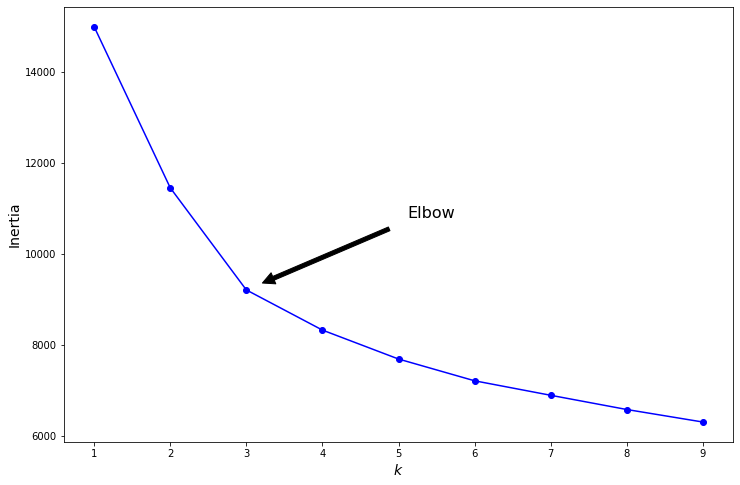

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
            xy=(3, inertias[2]),
            xytext=(0.55, 0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1)
) 
plt.show()

### From the plot above we note that for values of k from 1 to 3, there is a sharp fall in the inertia value and after this point (potential elbow point), the change in Inertia tapers off.We can carry out a domain specific cluster analysis with k=3 and k=4 and pick up which ever yields better results. 

### There is another method of Silhouette Score to compute the value of K that we will explore in the next section.

### Method 2: Silhouette Score

### Silhouette Score is the average of Silhouette coefficients given by Silhouette Coecient of X_i = (b – a) / max(a, b) 

### The range for the Silhouette coefficient is -1 to +1. Typically we want this coefficient to be greater than 0 and ideally close to 1 for well separated tight clusters.


### Let us plot the Silhouette score below-

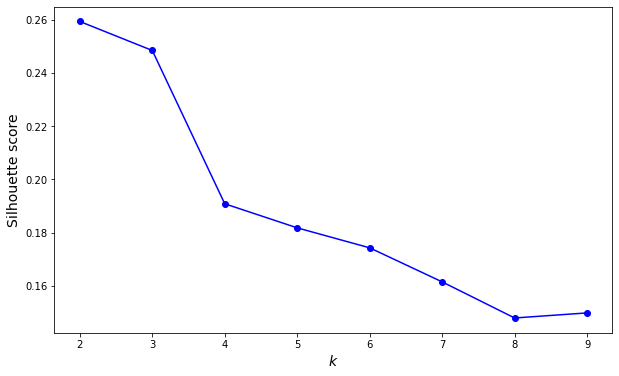

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_) 
                     for model in kmeans_per_k[1:]]# take the cluster indices and map it to the data X
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### In the plot above, we observe that K=2 gives us the maximum value of the Silhouette score but we prefer more than 2 clusters. K=3 gives us a slightly lower but reasonably good value of the silhouette coefficient. For values of k >3 we see a sharp decline in the value of the Silhouette score. Hence K=3 is the best option using both Elbow method as well as the Silhouette score.

### Conclusion

### Customer Segmentation is an effective strategy that enables companies to engage with their users in a more meaningful and customized manner. Clustering is a powerful unsupervised learning technique that can generate useful insights about the customer segments,as demonstrated in our simple case study above. 

### Hope you found my notebook useful. Your upvote and connect will keep me motivated to share my learning experiences as a data scientist. Thank you for reading!